# Análise exploratória das imagens do dataset

Bibliotecas utilizadas:

In [3]:
#from keras.applications import ImageDataGenerator, load_img
import os
import cv2

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
path = "./dataset/"

## Verificando balanceamento do Dataset

In [5]:
def getDirs(path):
    dirList = []
    for directory in os.listdir(path):
        if os.path.isdir(os.path.join(path,directory)):
            dirList.append(directory)
    return dirList

def countFiles(path):
    totalFiles = 0
    files = os.listdir(path)
    for file in files:
        totalFiles += 1
    return totalFiles

def getAverage(arr):
    return sum(arr)/len(arr)

def countFilesInDirs(path):
    dirs = getDirs(path)
    totalFiles = 0
    for directory in dirs:
        filePath = os.path.join(path, directory)
        totalFiles += countFiles(filePath)

    return totalFiles


In [6]:
print(countFilesInDirs(path))

2335


O dataset contém 15 classes, mas um total de 2335 exemplos, portanto existe um desbalanceamento na quantidade de exemplos por classe.

In [7]:
dirList = getDirs(path)
filesInClasses = []

for directory in dirList:
    total = countFiles(path+directory)
    filesInClasses.append(total)
    print(directory + ":" + str(total))

print("Média: " + str(getAverage(filesInClasses)))

Black Widow:132
Blue Tarantula:170
Bold Jumper:199
Brown Grass Spider:146
Brown Recluse Spider:150
Deinopis Spider:130
Golden Orb Weaver:163
Hobo Spider:162
Huntsman Spider:178
Ladybird Mimic Spider:114
Peacock Spider:167
Red Knee Tarantula:137
Spiny-backed Orb-weaver:164
White Kneed Tarantula:136
Yellow Garden Spider:187
Média: 155.66666666666666


O dataset contém uma média de 156 arquivos por classe, no entanto destacam-se algumas que estão absurdamente abaixo ou absurdamente acima, como Ladybird Mimic Spider e Huntsman Spider. 

## Verificando dimensões e imagens

In [59]:
def getImage(imagePath):
    return Image.open(imagePath)

def getFiles(path):
    return os.listdir(path)

def plotImages(path):
    dirs = getDirs(path)
    fig = plt.figure(figsize=(20,30))
    index = 1
    for directory in dirs:
        filesList = getFiles(path + directory)
        imagePath = path + directory + "/" + filesList[0]
        spiderImage = getImage(imagePath)
        img = np.array(getImage(imagePath))
        fig.add_subplot(8,8,index)
        plt.imshow(img)
        plt.axis('off')
        width, height = getDimensions(spiderImage)
        plt.title(directory + "\nDimensões:" + str(width) + "x" + str(height))
        index += 1

def getDimensions(image):
    return image.width, image.height


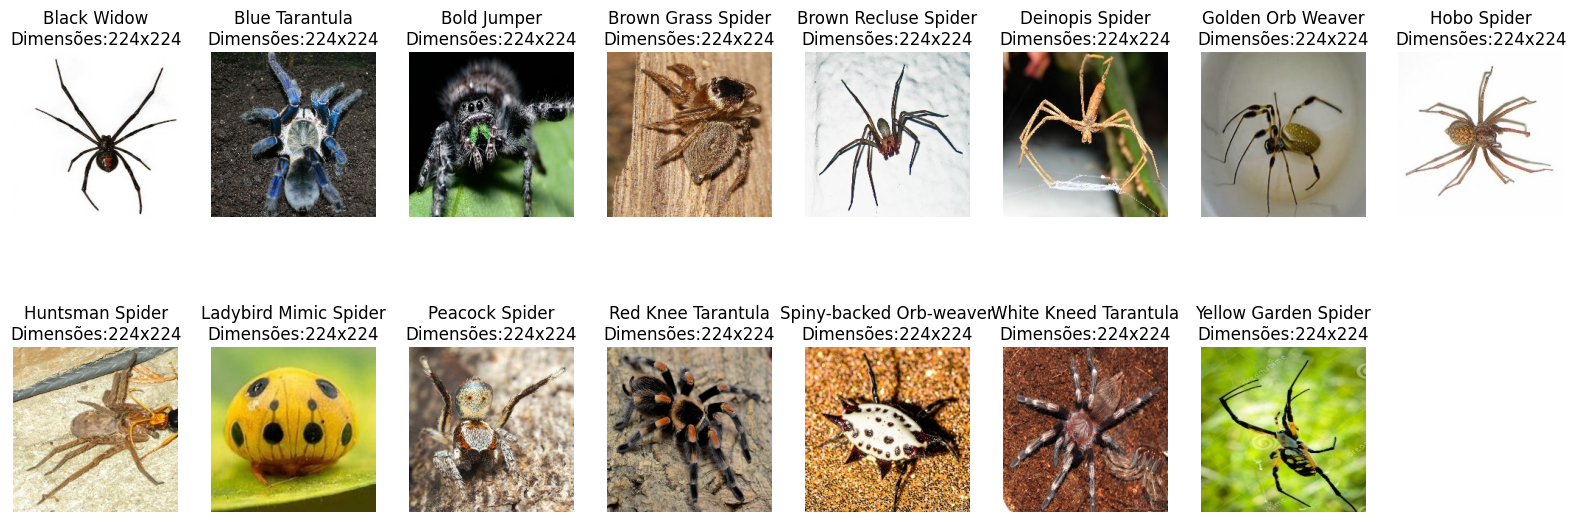

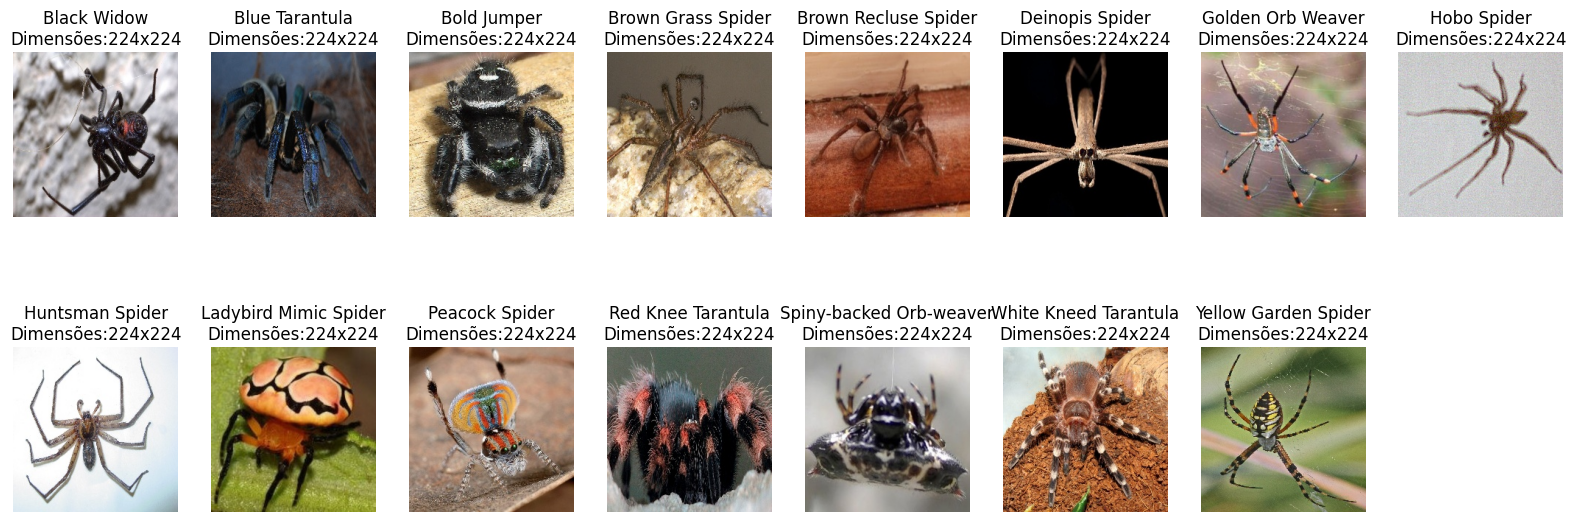

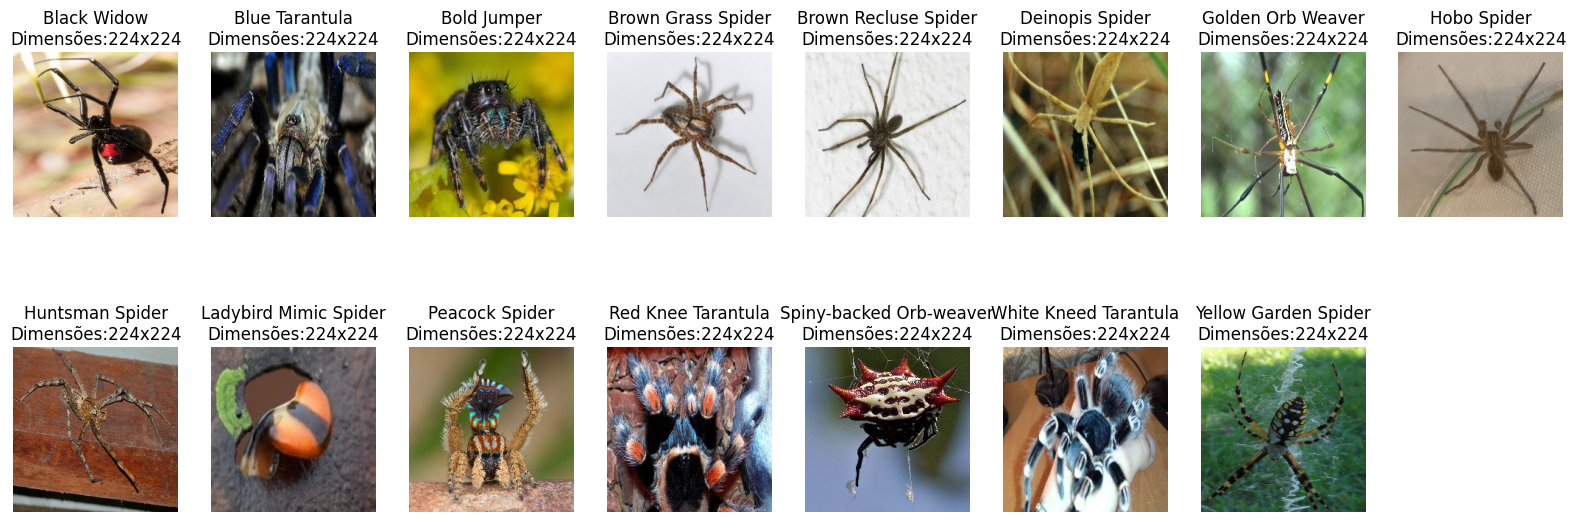

In [60]:
plotImages("./dataset_partition/test/")
plotImages("./dataset_partition/train/")
plotImages("./dataset_partition/validation/")

Analisando parte do dataset, nota-se que há uma uniformidade entre as dimensões das imagens, mas não há um controle na questão de como as fotografias foram tiradas. A maioria das fotos são tiradas na natureza, muitas vezes com um fundo que atrapalhará o reconhecimento, portanto existe uma fase de pré-processamento de dados que precisa ser feita antes do treinamento das redes.